# Mobile robot localization

In the upcoming chapters we will cover three fundamental aspects of mobile robots: robot localization, map building, and simultaneous localization and mapping (SLAM). 

Citing Cox [1]:

> *Using sensory information to locate the robot in its environment is the most fundamental problem to providing a mobile robot with autonomous capabilities*

Concretely, the goal of **robot localization** is, given a map of the environment and a sequence of sensor measurements, to retrieve the robot's pose in such environment. 

Localization problems can be grouped into different types (see Fig.1 below):
- **Position tracking**: the robot knows approximately where it is (for example, using odometry readings, which have to come at a certain frequency).
- **Global localization**: the robot has no clue where it is (*e.g.* GPS). It is needed when the robot is turned on.
- **Kidnapped robot problem**: the robot thinks that it knows where it is, but is wrong!

$\\[5pt]$

<figure style="text-align:center">
  <img src="images/localization_problems_low.png" alt="">
  <figcaption>Fig. 1. Different types of localization problems.</figcaption>
</figure>

## Markov localization

Markov localization is a probabilistic approach used in robotics and autonomous systems for estimating the position of a robot within a known environment. It is based on the principles of Markov processes and uses a grid-based representation of the environment. Here’s an overview of how it works:

**Key concepts**
1. State Space:
   - The environment is divided into a discrete grid of possible states (positions) where the robot can be located.
   - Each cell in the grid represents a possible position of the robot.
2. Belief Distribution:
   - The belief distribution, $P(x_t)$, represents the probability of the robot being in each possible state (grid cell) at time $t$.
   - Initially, the belief distribution might be uniform if the robot's position is completely unknown or peaked around an initial guess.
3. Motion model:
   - The motion model, $P(x_t​ ∣ x_{t−1}​, u_t​)$, represents the probability of transitioning from one state to another given a control action $u_t$​ (e.g., moving forward, turning).
   - This model accounts for the inherent uncertainty in the robot’s movements.
4. Sensor model
   - The sensor model, $P(z_t​ ∣ x_t​)$, represents the probability of observing sensor readings $z_t$​ given the robot is in state $x_t$​.

## Algorithm steps

1. Initialization:
   - Initialize the belief distribution $P(x_0)$ based on prior knowledge or assumptions about the robot's starting position. Take into account the grid_size! Use uniform distribution.
2. Prediction (Motion update):
   - Update the belief distribution based on the robot’s motion model.
   - This step involves convolving the previous belief distribution with the motion model to account for the uncertainty in movement.
   - $\bar{P}(x_t) = \sum_{x_{t-1}} P(x_t | x_{t-1}, u_t)P(x_{t-1})$
3. Correction (Measurement Update):
   - Update the belief distribution using the sensor model and the latest sensor readings.
   - This step involves multiplying the predicted belief distribution by the sensor model to account for the observed data.
   - $P(x_t​)=\eta P(z_t​ ∣ x_t​) P(x_t​)$
   - $\eta$ is is a normalization factor to ensure the probabilities sum to 1.
4. Iteration:
   - Repeat the prediction and correction steps as the robot continues to move and gather sensor data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Implementation

Complete the functions.

### Grid and Initial belief

We define the environment as a grid and initialize the belief distribution uniformly:
$P(x_0, y_0) = \frac{1}{N \times M},$
where $N$ and $M$ are the dimensions of the grid.

In [2]:
# Grid dimensions
grid_size = (10, 10)

# Initialize belief: uniform distribution
belief = None

The motion model updates the belief distribution based on the robot action $u_t$:

$\overline{P}(x_t, y_t) = \sum_{x_{t-1}, y_{t-1}} P(x_t, y_t | x_{t-1}, y_{t-1}, u_t) P(x_{t-1}, y_{t-1})$

where \(P(x_t, y_t | x_{t-1}, y_{t-1}, u_t)\) is the probability of transitioning to \((x_t, y_t)\) from \((x_{t-1}, y_{t-1})\) given action \(u_t\).

In our simplified motion model, we assume a high probability of staying in the same cell and a lower probability of moving to an adjacent cell. For instance, for action 'up':
$\overline{P}(x_t, y_t) = 0.75 \cdot P(x_t, y_t) + 0.25 \cdot P(x_t, (y_t-1) \mod M)$

In [1]:
# Define the motion model
def motion_model(belief, action):
    new_belief = np.zeros_like(belief)
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            # Assume equal probability for moving in all directions
            if action == 'up':
                new_belief[i, j] = None
                new_belief[i, j] += None
            elif action == 'down':
                new_belief[i, j] = None
                new_belief[i, j] += None
            elif action == 'left':
                new_belief[i, j] = None
                new_belief[i, j] += None
            elif action == 'right':
                new_belief[i, j] = None
                new_belief[i, j] += None
    return None  # Normalize

### Sensor model

The sensor model updates the belief based on the observation $z_t$:
$P(x_t, y_t) = \eta P(z_t | x_t, y_t) \overline{P}(x_t, y_t)$
where $\eta$ is a normalization factor ensuring that the probabilities sum to 1, and $P(z_t | x_t, y_t)$ is the probability of observing $z_t$ given the robot is at $(x_t, y_t)$.

In our case, the sensor model is based on the Manhattan distance between the estimated position and the true position. If the distance matches the observation:
$P(z_t | x_t, y_t) = 
\begin{cases} 
0.9 & \text{if } |x_t - x_{\text{true}}| + |y_t - y_{\text{true}}| = z_t \\
0.1 & \text{otherwise}
\end{cases}
$

In [13]:
# Define the sensor model
def sensor_model(belief, observation, true_position):
    new_belief = np.zeros_like(belief)
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            distance = None
            if distance == observation:
                new_belief[i, j] = None
            else:
                new_belief[i, j] = None
    return None  # Normalize

### Complete algorithm


1. Initialization:
   - $P(x_0, y_0) = \frac{1}{N \times M}$
2. Prediction Step (Motion Update):
   - $\overline{P}(x_t, y_t) = \sum_{x_{t-1}, y_{t-1}} P(x_t, y_t | x_{t-1}, y_{t-1}, u_t) P(x_{t-1}, y_{t-1})$
3. Correction Step (Measurement Update)}:
    - $P(x_t, y_t) = \eta P(z_t | x_t, y_t) \overline{P}(x_t, y_t)$,
    - $\eta = \frac{1}{\sum_{x_t, y_t} P(z_t | x_t, y_t) \overline{P}(x_t, y_t)}$
    


In [14]:
# Define the true position of the robot
true_position = (7, 3)

# Simulation steps
steps = 5
actions = ['up', 'up', 'left', 'down', 'right']
observations = [4, 3, 2, 1, 0]  # Simulated sensor readings

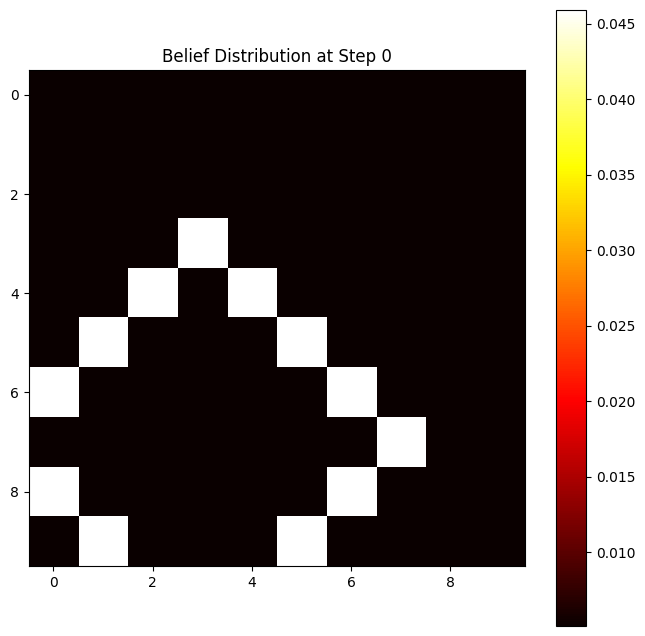

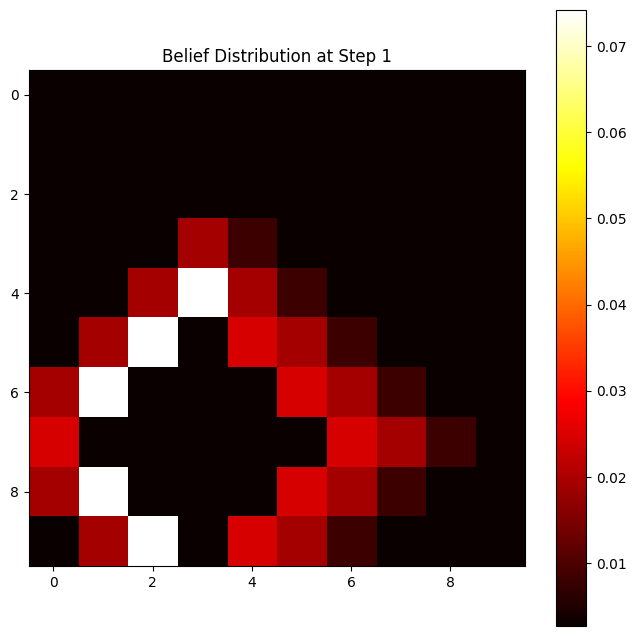

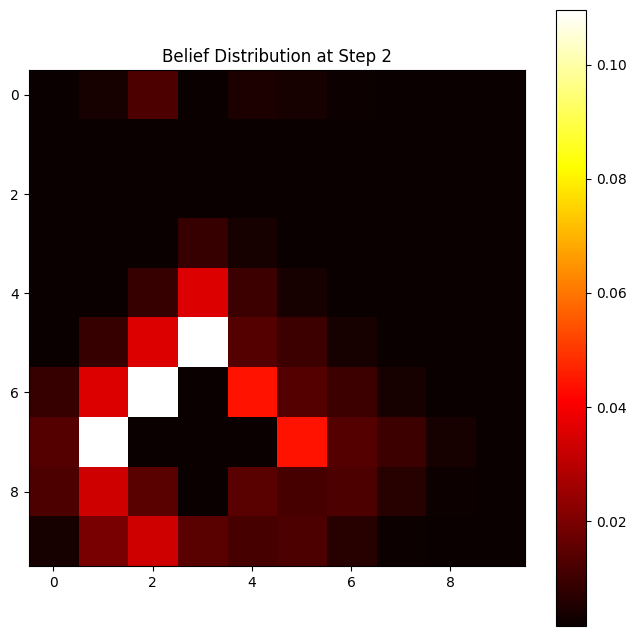

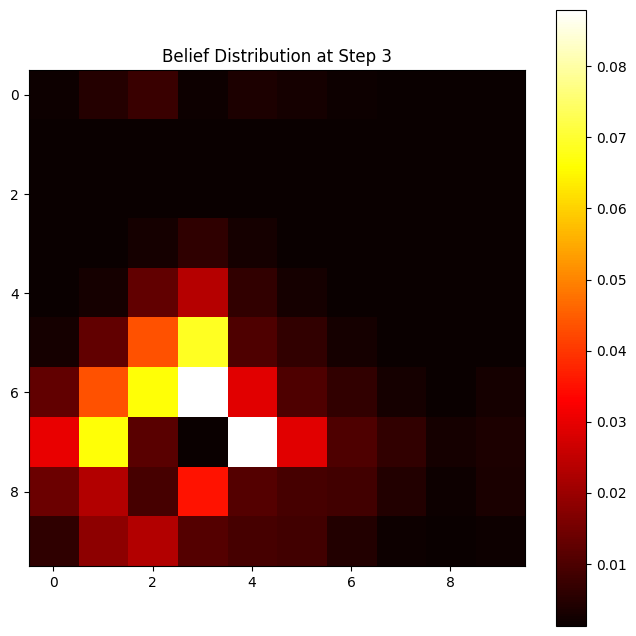

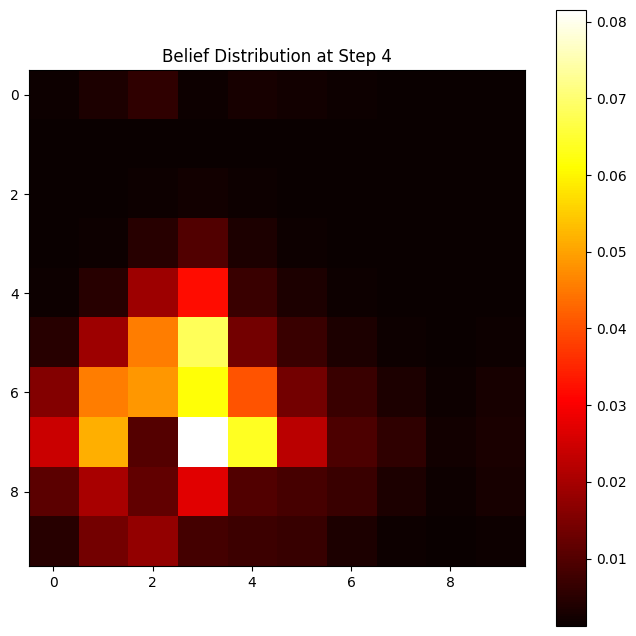

In [15]:
# Visualization function
def plot_belief(belief, step):
    plt.figure(figsize=(8, 8))
    plt.imshow(belief, cmap='hot', interpolation='nearest')
    plt.title(f'Belief Distribution at Step {step}')
    plt.colorbar()
    plt.show()

# Run the Markov localization
for step in range(steps):
    # Prediction step
    belief = motion_model(belief, actions[step])
    
    # Correction step
    belief = sensor_model(belief, observations[step], true_position)
    
    # Visualization
    plot_belief(belief, step)